In [1]:
import os
os.chdir("/home/yutinlin/workspace/iMSminer")
from data_preprocessing import Preprocess
os.chdir("/home/yutinlin/workspace/iMSminer")
from data_analysis import DataAnalysis
import assorted_functions

import matplotlib.pyplot as plt
import IPython.display as Disp
from ipywidgets import widgets
import cv2

2024-05-18 05:29:48,189	INFO worker.py:1749 -- Started a local Ray instance.
/home/yutinlin/.local/lib/python3.10/site-packages/cupy/_environment.py:487: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda11x, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


cupy is installed and imported successfully!


GPU Detected:
 name
NVIDIA GeForce RTX 4080 Laptop GPU
Cupy is installed and imported successfully!
Cudf is not installed or could not be imported.
Numba is installed and imported successfully!


What is your image dataset directory?  /home/yutinlin/workspace/high_res_bladder_iMSminer_manuscript4
How many ROIs are you analyzing?  1
Render figures with `small`, `medium`, or `large` ratio?  medium


Importing HR2MSI mouse urinary bladder S096.csv.
Finished importing HR2MSI mouse urinary bladder S096.csv.


How to name your ROIs, from left to right, top to bottom? Separate ROI names by one space. 1


AttributeError: 'bbox_select' object has no attribute 'canvas'

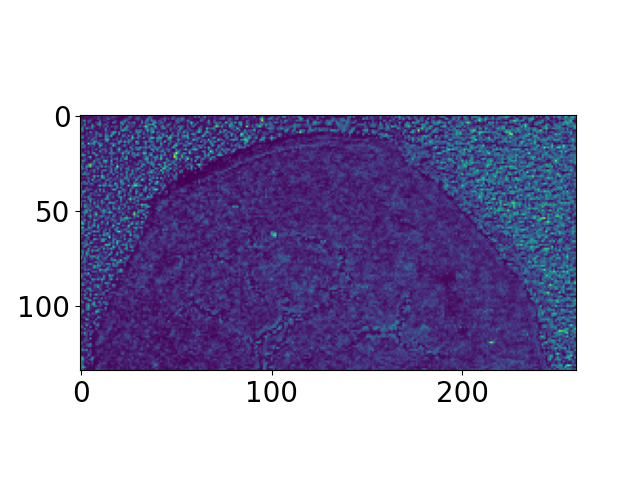

In [2]:
%matplotlib ipympl
data_analysis = DataAnalysis()
data_analysis.load_preprocessed_data()

In [ ]:
/home/yutinlin/workspace/high_res_bladder_iMSminer_manuscript4

In [3]:

import matplotlib.pyplot as plt
import IPython.display as Disp
from ipywidgets import widgets
import numpy as np
import cv2
import time

class bbox_select():


    def __init__(self,im):
        self.exit=False
        self.im = im
        self.selected_points = []
        self.fig,ax = plt.subplots()
        self.img = ax.imshow(self.im.copy())
        self.ka = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        disconnect_button = widgets.Button(description="Disconnect mpl")
        Disp.display(disconnect_button)
        disconnect_button.on_click(self.disconnect_mpl)


        
    def poly_img(self,img,pts):
        pts = np.array(pts, np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.polylines(img,[pts],True,(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)),7)
        return img

    def onclick(self, event):
    #display(str(event))
        self.selected_points.append([event.xdata,event.ydata])
        if len(self.selected_points)>1:
            self.fig
            self.img.set_data(self.poly_img(self.im.copy(),self.selected_points))
    def disconnect_mpl(self,_):
        self.fig.canvas.mpl_disconnect(self.ka)
        self.exit = True

        

In [ ]:
%matplotlib ipympl 

for i in range(3):
    exit = False
    bs = bbox_select(data_analysis.img_array_1c[0])
    while not exit:
        time.sleep(2)
        if bs.exit:
            exit = True
    
    


Button(description='Disconnect mpl', style=ButtonStyle())

In [15]:
bs.selected_points

[]

In [18]:
test_array = np.append(test_array, bs.selected_points)

Button(description='Disconnect mpl', style=ButtonStyle())

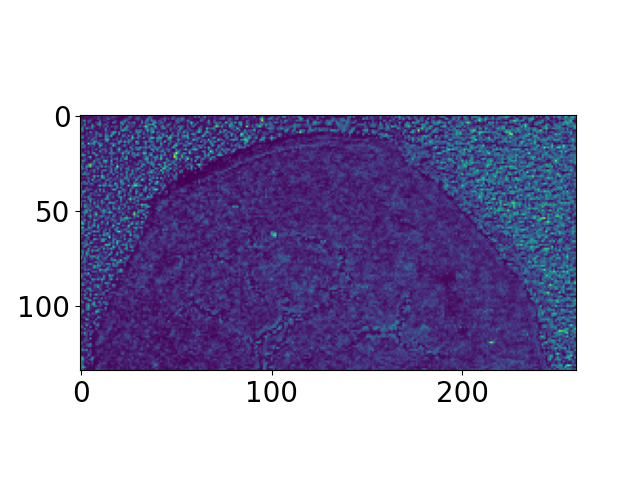

Button(description='Disconnect mpl', style=ButtonStyle())

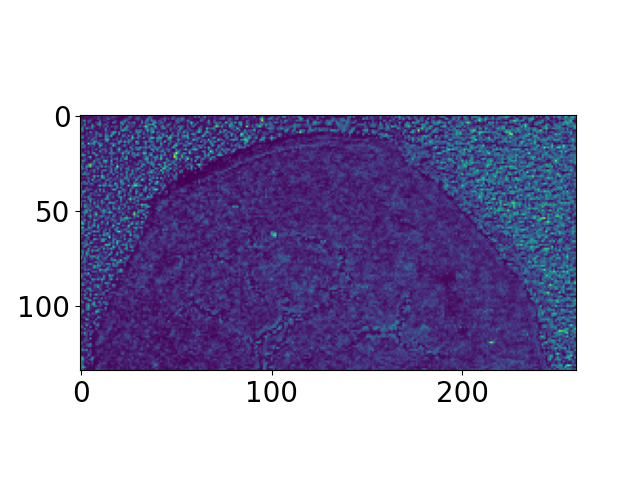

In [ ]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import IPython.display as Disp
from ipywidgets import widgets
import numpy as np
import cv2
import time

class bbox_select():
    def __init__(self, im, i):
        self.exit = False
        self.im = im
        self.i = i
        self.selected_points = []
        self.fig, self.ax = plt.subplots()
        self.img = self.ax.imshow(self.im.copy())
        self.ka = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        self.disconnect_button = widgets.Button(description="Disconnect mpl")
        Disp.display(self.disconnect_button)
        self.disconnect_button.on_click(self.disconnect_mpl)
        plt.show()

    def poly_img(self, img, pts):
        pts = np.array(pts, np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(img, [pts], True, (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)), 2)
        return img

    def onclick(self, event):
        self.selected_points.append([event.xdata, event.ydata])
        if len(self.selected_points) > 1:
            self.img.set_data(self.poly_img(self.im.copy(), self.selected_points))

    def disconnect_mpl(self, _):
        self.fig.canvas.mpl_disconnect(self.ka)
        self.selected_points.append([f"ROI_{i}", f"ROI_{i}"])
        

# # Sample image for demonstration
# im = np.random.rand(100, 100, 3)


# array = np.asarray([])
# plt.ion()
# for i in range(2):
#     bs = bbox_select(im, i)


for i in range(2):
    #ROI_dim = cv2.selectROI('ROI_selection', img_array_1c[0], showCrosshair=True)
    ROI_select = bbox_select(data_analysis.img_array_1c[0],i)
    #ROI_dim = np.asarray(ROI_select.selected_points)
    #ROI_dim_array = np.append(ROI_dim_array, ROI_dim.reshape((1,-1)), axis=0)
# cv2.destroyAllWindows()

while True:
    try:
        any(f'ROI_1' in sublist for sublist in bs.selected_points)
        print("success")
        break
    except:
        time.sleep(10)




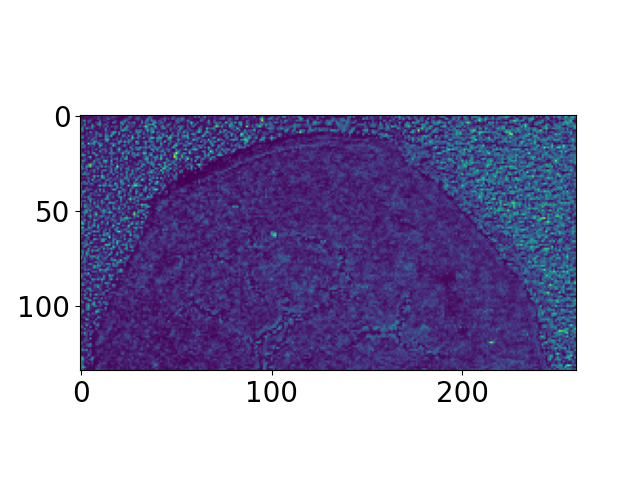

In [11]:
plt.imshow(data_analysis.img_array_1c[0])
plt.show()

In [8]:
i=2
any(f'ROI_{i}' in sublist for sublist in bs.selected_points)

False

In [14]:
import ipywidgets as widgets
from IPython.display import display
output = widgets.Output()

@output.capture(clear_output=False,wait=True) # based on https://github.com/jupyter-widgets/ipywidgets/issues/1846 and https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html
def sayHello(b):
    print('Hello world!')

run_button = widgets.Button(
      description = 'run'
)
run_button.on_click(sayHello)
display(run_button)
output

Button(description='run', style=ButtonStyle())

Output()